# APPENDIX B: Testing Jeans equilibrium

In [1]:
import sys
import pickle
from numpy import *

import treal_functions
import slopes_functions
import prepare_functions
import cuspcore_aux
import cuspcore_plots
import evolving
import fitting as fit
from cuspcore_aux import *
from cuspcore_plots import *
from evolving import *

sim = ['g1.08e11'][0]
directory='/cs/sci/freundlich/CUSPCORE/Analysis/DATA/'
directory='/cs/sci/freundlich/CUSPCORE/Michael/' 

with open(directory+'NIHAO-%s.pickle'%sim[1:]) as f:
    gl = pickle.load(f)
 
gl = slopes_functions.derive_slopes(gl,polyorder=3,sigma = 21,mode= 'interp',double_smooth=False,rlim=[-2.,0.],use_fangzhou_Rvir=True)    
gl = prepare_functions.define_brho(gl,polyorder=3,sigma = 21,mode= 'interp',double_smooth=False,rlim=[-2.,0.],use_fangzhou_Rvir=True)
treal=treal_functions.load_or_create_gl(sim)

fitrange=prepare_functions.get_fitrange(gl)
gl=prepare_functions.reduce_range_gl(gl,fitrange)
treal=prepare_functions.reduce_range_Treal(treal,fitrange)

a_array=[]

for (i,ss) in zip(range(size(gl)),gl):
    a_array.append(ss['a'])           

a_array=array(a_array)

ok_fangzhou,r12_fangzhou,rvir_fangzhou,mvir_fangzhou=get_fangzhou_radii(sim,a_array,get_all=False)
gl=fit.do_fits(gl,rvir_fangzhou,mvir_fangzhou,1.,0.01,2.)
print 'Done'



/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:33: RuntimeWarning: invalid value encountered in greater_equal
  r_range=where((log10(r/Rvir)>=rlim[0])&(log10(r/Rvir)<rlim[1]))
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:33: RuntimeWarning: invalid value encountered in less
  r_range=where((log10(r/Rvir)>=rlim[0])&(log10(r/Rvir)<rlim[1]))
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:42: RuntimeWarning: invalid value encountered in divide
  dM = M/sqrt(cumsum(n))
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:46: RuntimeWarning: divide by zero encountered in log10
  logrho=log10(rho)
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:79: RuntimeWarning: divide by zero encountered in log10
  logsigmar = log10(sigmar)
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:80: RuntimeWarning: divide by zero encountered in log10
  logsigmar2 = 2*log10(sigmar)
/cs/sci/freundlich/CU

 
Loading existing file Treal-1.08e11.pickle


/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/prepare_functions.py:123: RuntimeWarning: invalid value encountered in less_equal
  outer = r <= Rvir
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/prepare_functions.py:124: RuntimeWarning: invalid value encountered in greater
  conv  = r > 0.01*Rvir
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/prepare_functions.py:125: RuntimeWarning: invalid value encountered in greater_equal
  soft  = r >= eps


Reducing the range of gl
Reducing the range of Treal


/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Done


In [2]:
# FIGURE PROPERTIES

fontsize=20
legendsize=fontsize
linewidth=2
linesize=5
ticksize=fontsize-4
figsize=(8,16)
figsize=(8,12)

rcParams['axes.linewidth'] = 1
rcParams['xtick.major.size'] = 6
rcParams['xtick.major.width'] = 1
rcParams['xtick.minor.size'] = 3
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 6
rcParams['ytick.major.width'] = 1
rcParams['ytick.minor.size'] = 3
rcParams['ytick.minor.width'] = 1
rcParams['xtick.labelsize'] = fontsize
rcParams['ytick.labelsize'] = fontsize

rcParams['figure.subplot.left']=0.15
rcParams['figure.subplot.right']=0.95
rcParams['figure.subplot.bottom']=0.15
rcParams['figure.subplot.top']=0.95
rcParams['figure.subplot.wspace']=0.1
rcParams['figure.subplot.hspace']=0.1


In [3]:
rlim=[-2.,0.]
component='d'
tmin=2.

parsec=3.085677581e16 #m
year=3.1557600e7 #s
kms_to_kpcGyr=1/parsec*year*1e9


/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


mean difference:  -0.056389195893
mean RMS difference:  0.112904137768


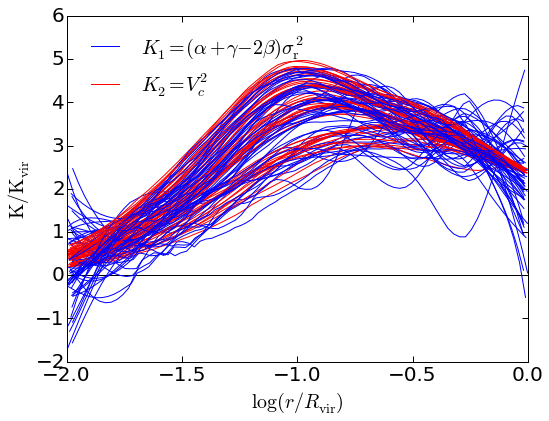

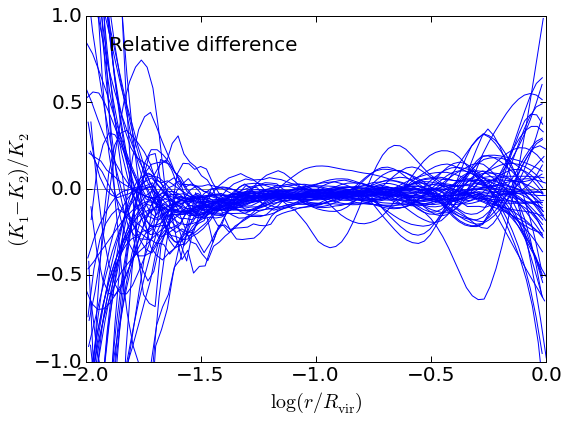

In [4]:
# COMPARE (alpha+gamma-2beta)sigma_r^2 and Vc^2

from matplotlib.pylab import *
G = 4.499753324353496e-06 # gravitational constant [kpc^3 Gyr^-2 Msun^-1]

rlim=[-2.,0.]
component='d'
tmin=2.

parsec=3.085677581e16 #m
year=3.1557600e7 #s
kms_to_kpcGyr=1/parsec*year*1e9

###############################

figure(figsize=(8,6))
axhline(0,color='k')
counter=0
for (ss, i) in zip(gl, range(size(gl))):
    
    r= ss[component]['r']
    Rvir=ss['Rvir']
    Mvir=ss[component]['Mvir']
    Kvir=0.5*G*Mvir/Rvir
    logr=log10(ss[component]['r']/ss['Rvir'])
    t=ss['t']
    
    # Term1 = (alpha+gamma-2beta)sigma_r^2
    sigma2=(ss[component]['sigmar_smooth']/3.085677581*3.1556952)**2
    Term1 = (ss[component]['alpha']+ss[component]['gamma']-2.*ss[component]['beta_smooth'])*sigma2/Kvir
    
    # Term2 = Vc2
    vc2=G*ss[component]['Mall']/ss[component]['r']
    Term2=vc2/Kvir
    
    if t>tmin:
        if counter==0:
            plot(logr,Term1,color='b',linestyle='-',label=r'$K_{1}=(\alpha+\gamma-2\beta)\sigma_{\rm r}^2$')
            plot(logr,Term2,color='r',label=r'$K_{2} = V_c^2$')
        else:
            plot(logr,Term1,color='b',linestyle='-')
            plot(logr,Term2,color='r')
    
        counter=counter+1
    
xlabel(r'$\log(r/R_{\rm vir})$',fontsize=fontsize)
ylabel(r'$\rm K/K_{vir}$',fontsize=fontsize) #$\rm [kpc^2 Gyr^{-2}]$
legend(fontsize=legendsize,frameon=False,loc='upper left')

ylim(-2,6)
xlim(rlim)

###############################

figure(figsize=(8,6))
axhline(0,color='gray')
DT_all=[]
DT_mean=[]
DT_rms=[]

for (ss, i) in zip(gl, range(size(gl))):
    
    r= ss[component]['r']
    Rvir=ss['Rvir']
    Mvir=ss[component]['Mvir']
    Kvir=0.5*G*Mvir/Rvir
    logr=log10(ss[component]['r']/ss['Rvir'])
    t=ss['t']
    
    # Term1 = (alpha+gamma-2beta)sigma_r^2
    sigma2=(ss[component]['sigmar_smooth']/3.085677581*3.1556952)**2
    Term1 = (ss[component]['alpha']+ss[component]['gamma']-2.*ss[component]['beta_smooth'])*sigma2/Kvir
    
    # Term2 = Vc2
    vc2=G*ss[component]['Mall']/ss[component]['r']
    Term2=vc2/Kvir
    
    # Relative difference
    DT=(Term1-Term2)/Term2
    
    if t>tmin:
        rrange=where((logr>-1.75)&(logr<-0.25))
        DT_all.append(array(DT[rrange]))
        DT_mean.append(mean(array_nonan(array(DT[rrange]))))
        DT_rms.append(sqrt(mean(array_nonan(array(DT[rrange])**2))))

        plot(logr,DT,color='b',linestyle='-')
        
xlabel(r'$\log(r/R_{\rm vir})$',fontsize=fontsize)
ylabel(r'$(K_{1}-K_{2})/K_{2}$',fontsize=fontsize) #$\rm [kpc^2 Gyr^{-2}]$
legend(fontsize=legendsize,frameon=False,loc='upper left')

ylim(-1.,1.)
xlim(rlim)
ax=gca()
ax.text(0.05,0.9,r'Relative difference',fontsize=fontsize,transform=ax.transAxes)

print 'mean difference: ', mean(array_nonan(array(DT_mean)))
print 'mean RMS difference: ', mean(array_nonan(array(DT_rms)))
    

In [5]:
abscisse=log10(logspace(-2,0,1000))

K1_curve=[]
K2_curve=[]
DK_curve=[]

for (ss, i) in zip(gl, range(size(gl))):
    
    r= ss[component]['r']
    Rvir=ss['Rvir']
    Mvir=ss[component]['Mvir']
    Kvir=0.5*G*Mvir/Rvir
    logr=log10(ss[component]['r']/ss['Rvir'])
    t=ss['t']
    
    # Term1 = (alpha+gamma-2beta)sigma_r^2
    sigma2=(ss[component]['sigmar_smooth']/3.085677581*3.1556952)**2
    Term1 = (ss[component]['alpha']+ss[component]['gamma']-2.*ss[component]['beta_smooth'])*sigma2/Kvir
    
    # Term2 = Vc2
    vc2=G*ss[component]['Mall']/ss[component]['r']
    Term2=vc2/Kvir

    #Relative difference
    DT=(Term1-Term2)/Term2
    rrange=where((logr<rlim[0])&(logr>rlim[1]))
    DT[rrange]=nan
    
    if t>tmin:
        K1_curve.append(list(interp(abscisse,logr,Term1,left=nan,right=nan)))
        K2_curve.append(list(interp(abscisse,logr,Term2,left=nan,right=nan)))
        DK_curve.append(list(interp(abscisse,logr,DT,left=nan,right=nan)))

K1_curve=array(K1_curve)
K2_curve=array(K2_curve)
DK_curve=array(DK_curve)

K1_min=nan*ones_like(abscisse)
K1_max=nan*ones_like(abscisse)
K1_med=nan*ones_like(abscisse)
K2_min=nan*ones_like(abscisse)
K2_max=nan*ones_like(abscisse)
K2_med=nan*ones_like(abscisse)
DK_min=nan*ones_like(abscisse)
DK_max=nan*ones_like(abscisse)
DK_med=nan*ones_like(abscisse)
DK_rms=nan*ones_like(abscisse)
for i in range(size(abscisse)):
    try:
        K1_min[i]=amin(array_nonan(K1_curve[:,i]))
        K1_max[i]=amax(array_nonan(K1_curve[:,i]))
        K1_med[i]=median((K1_curve[:,i]))
    except:
        continue
    try:
        K2_min[i]=amin(array_nonan(K2_curve[:,i]))
        K2_max[i]=amax(array_nonan(K2_curve[:,i]))
        K2_med[i]=median((K2_curve[:,i]))
    except:
        continue
    try:
        DK_min[i]=amin(array_nonan(DK_curve[:,i]))
        DK_max[i]=amax(array_nonan(DK_curve[:,i]))
        DK_med[i]=median((DK_curve[:,i]))
        DK_rms[i]=std(array_nonan(DK_curve[:,i]))
    except:
        continue        


/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


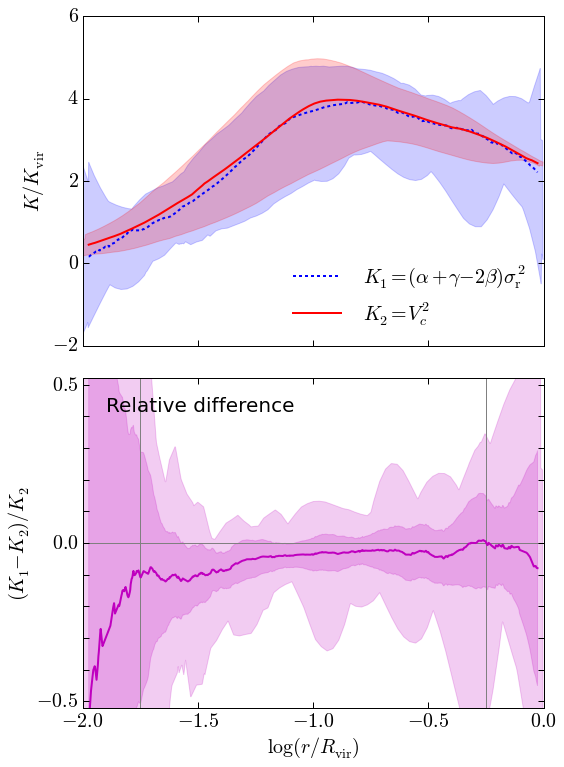

In [7]:
alpha_fill=0.2


fig=figure(figsize=figsize)
clf()

ax3=subplot(211)


fill_between(abscisse,K1_min,K1_max,color='b',alpha=alpha_fill)
plot(abscisse,K1_med,color='b',lw=2,ls='--',dashes=(3,3),label=r'$K_{1}=(\alpha+\gamma-2\beta)\sigma_{\rm r}^2$')

fill_between(abscisse,K2_min,K2_max,color='r',alpha=alpha_fill)
plot(abscisse,K2_med,color='r',lw=2,label=r'$K_{2} = V_c^2$')


ylabel(r'$K/K_{\rm vir}$',fontsize=fontsize) #$\rm [kpc^2 Gyr^{-2}]$
legend(fontsize=legendsize,frameon=False,loc='lower right',handlelength=3)

ax3.invert_yaxis()
yticknames=['$%i$'%int(item) for item in linspace(-2,6,5)]
yticks(linspace(-2,6,5),yticknames)

xticknames=['$%.1f$'%log10(item) for item in logspace(-2,1,7)]
xticks(log10(logspace(-2,1,7)),xticknames)

ylim(-2,6)
xlim(rlim)

ax2=subplot(212, sharex=ax3)

axhline(0,color='gray')
axvline(-1.75,color='gray')
axvline(-0.25,color='gray')

fill_between(abscisse,DK_min,DK_max,color='m',alpha=alpha_fill)
fill_between(abscisse,DK_med-DK_rms,DK_med+DK_rms,color='m',alpha=alpha_fill)
plot(abscisse,DK_med,lw=2,color='m')

xlabel(r'$\log(r/R_{\rm vir})$',fontsize=fontsize)
ylabel(r'$(K_{1}-K_{2})/K_{2}$',fontsize=fontsize) #$\rm [kpc^2 Gyr^{-2}]$

xticknames=['$%.1f$'%log10(item) for item in logspace(-2,0,5)]
xticks(log10(logspace(-2,0,5)),xticknames,visible=True)

yticknames=['$%.1f$'%log10(item) for item in logspace(-0.5,0.5,11)]
yticknames=['$-0.5$', ' ', ' ', ' ', ' ', '$0.0$', ' ', ' ', ' ', ' ','$0.5$']
yticks(log10(logspace(-0.5,0.5,11)),yticknames,visible=True)

ylim(-.52,.52)
xlim(rlim)

ax=gca()
ax.text(0.05,0.9,r'Relative difference',fontsize=fontsize,transform=ax.transAxes)

setp(ax3.get_xticklabels(), visible=False)
